In [1]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

from dotenv import load_dotenv



In [2]:
load_dotenv()

DB_CONFIG = {
    'host': os.getenv("DB_HOST"),
    'user': os.getenv("DB_USER"),
    'password': os.getenv("DB_PASS"),
    'dbname': os.getenv("DB_NAME"),
    'port': os.getenv("DB_PORT")
}

In [3]:
# Get all the crimes data from the database not from csv using psycopg2
def get_crimes_data():
    import psycopg2
    conn = psycopg2.connect(**DB_CONFIG)
    query = "SELECT * FROM crimes order by date desc"
    df = pd.read_sql(query, conn)
    conn.close()
    return df

In [4]:
df = get_crimes_data()

/tmp/ipykernel_287131/3151581617.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
df.head(5)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude
0,13618950,JH454189,2001-01-01,051XX W MEDILL AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,25.0,31.0,19.0,17,NaN,NaN,2001,2024-10-05 15:41:21,NaN,NaN
1,11950657,JD114742,2001-01-01,061XX S FAIRFIELD AVE,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,True,True,...,8.0,16.0,66.0,02,NaN,NaN,2001,2020-11-07 15:40:36,NaN,NaN
2,7208412,HR623380,2001-01-01,003XX W 105TH PL,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,...,5.0,34.0,49.0,02,1175689.0,1835000.0,2001,2021-09-07 15:41:02,41.702605,-87.632285
3,7122679,HR531333,2001-01-01,008XX W MARGATE TER,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,...,20.0,48.0,3.0,06,1169494.0,1933332.0,2001,2009-09-18 01:04:45,41.972573,-87.652114
4,6742268,HR159902,2001-01-01,076XX S MAY ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,...,6.0,17.0,71.0,02,1170017.0,1854081.0,2001,2021-09-07 15:41:02,41.755091,-87.652502


## Explore Data

In [10]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8299302 entries, 0 to 8299301
Data columns (total 21 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id                    int64         
 1   case_number           object        
 2   date                  datetime64[ns]
 3   block                 object        
 4   iucr                  object        
 5   primary_type          object        
 6   description           object        
 7   location_description  object        
 8   arrest                bool          
 9   domestic              bool          
 10  beat                  int64         
 11  district              float64       
 12  ward                  float64       
 13  community_area        float64       
 14  fbi_code              object        
 15  x_coordinate          float64       
 16  y_coordinate          float64       
 17  year                  int64         
 18  updated_on            datetime64[ns]
 19  

In [12]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [14]:
crime_data_columns = df.columns

In [ ]:
missing_values = df.isna()
print("\nMissing Values:\n", missing_values.sum())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(missing_values)
plt.title("Missing Data Heatmap")
plt.show()

## Handling Missing Values

In [ ]:
# df['Location Description'] = df['Location Description'].fillna('Unknown')
# df['Community Area'] = df['Community Area'].fillna(-1)
# df['Ward'] = df['Ward'].fillna(-1)
# df['Community Area'].value_counts()

# We can remove the rows with missing values in Location columns for spatial analysis
# df_dropped = df.dropna(subset= ['Latitude', 'Longitude'])


Community Area
 25.0    507846
 8.0     294717
 43.0    269932
 23.0    255692
 28.0    255305
          ...  
 12.0     15246
 47.0     12138
-1.0       9656
 9.0       8215
 0.0         76
Name: count, Length: 79, dtype: int64

## Visualizations

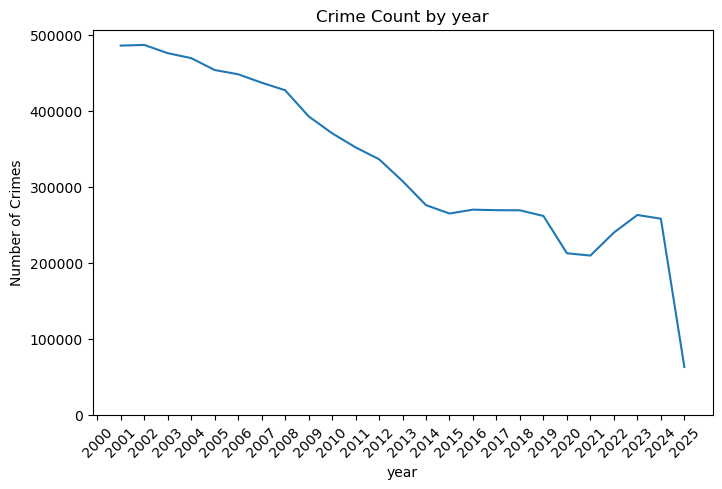

In [5]:
crimes_by_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
crimes_by_year.plot(kind='line')
plt.title("Crime Count by year")
plt.xlabel("year")
plt.ylabel("Number of Crimes")
plt.ylim(0, crimes_by_year.max() + 20000)
plt.xticks(range(2000,2026), rotation=45)

plt.xticks(rotation=45)
plt.show()


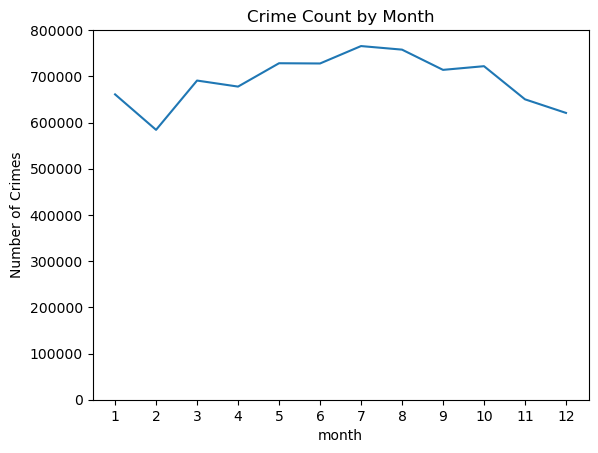

In [6]:
df['month'] = df['date'].dt.month
# crime_by_month = df[df.Year < 2025].groupby('month').size().reset_index(name='crime_count')
crime_by_month = df['month'].value_counts().sort_index()
crime_by_month.plot(kind='line') 
plt.ylim(0, 800000)
plt.xticks(range(1,13))
plt.ylabel("Number of Crimes")
plt.title("Crime Count by Month")
# plt.plot(crime_by_month.month, crime_by_month.crime_count)
plt.show()

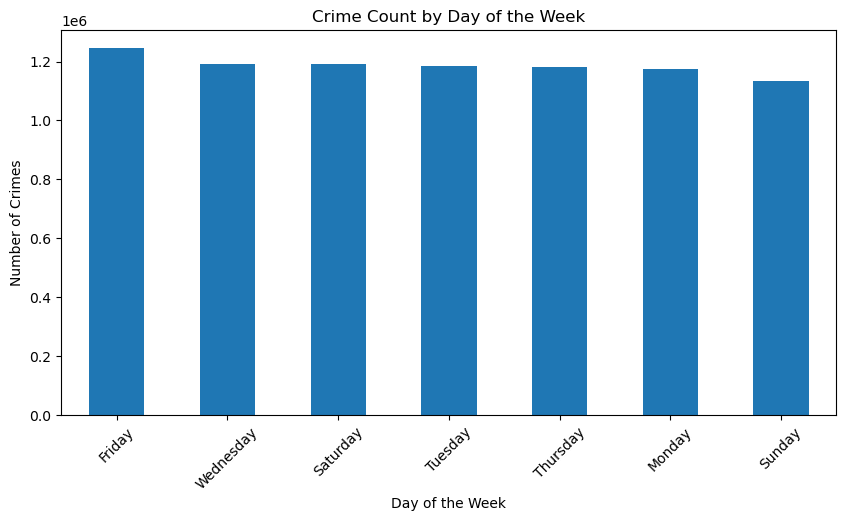

In [7]:
# Crimes by Day of the Week
df['day_of_week'] = df['date'].dt.day_name()
crimes_by_day = df['day_of_week'].value_counts()

plt.figure(figsize=(10, 5))
crimes_by_day.plot(kind = 'bar')
plt.title("Crime Count by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

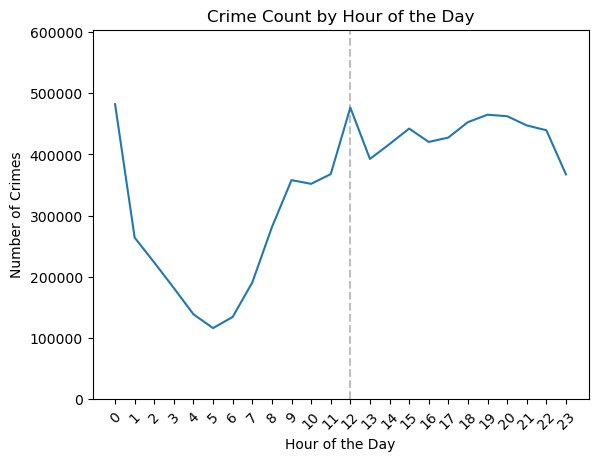

In [10]:
df['hour'] = df['date'].dt.hour
crime_by_hour = df.groupby('hour').size().reset_index(name='crime_count')
plt.ylim(bottom=0, top=crime_by_hour.crime_count.max() + crime_by_hour.crime_count.std())
plt.xticks(range(0,24), rotation=45)

plt.axvline(x=12, color='gray', linestyle='--', alpha=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crimes")
plt.title("Crime Count by Hour of the Day")
# plt.grid()
plt.plot(crime_by_hour.hour, crime_by_hour.crime_count)
plt.show()

In the above figure we can see the no. of crimes clearly depend on the time of the day. Also, the spike in the middle indicates unusual crime counts during noon.

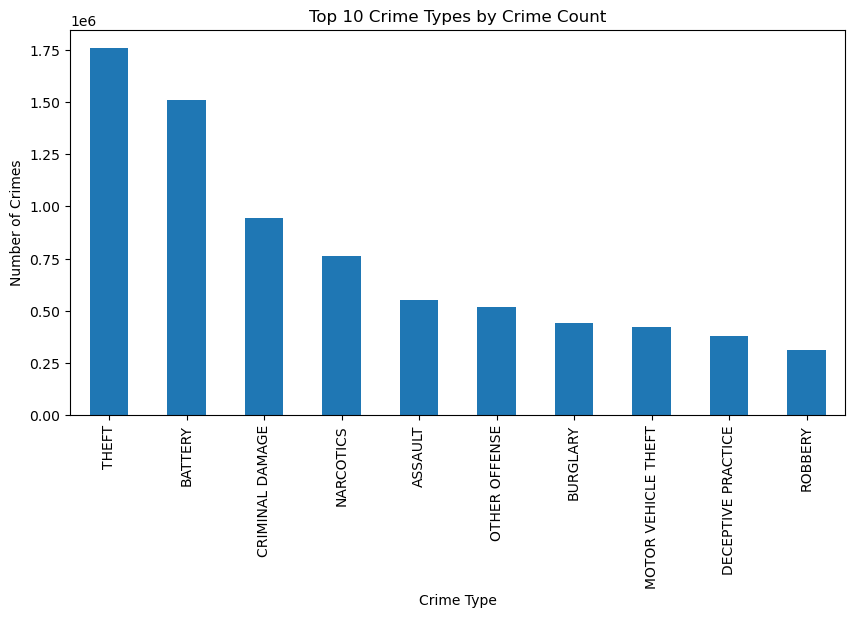

In [11]:
# Most Frequent Crime Types
crimes_by_type = df['primary_type'].value_counts().head(10)
plt.figure(figsize=(10, 5))
crimes_by_type.plot(kind='bar')
plt.title("Top 10 Crime Types by Crime Count")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.show()

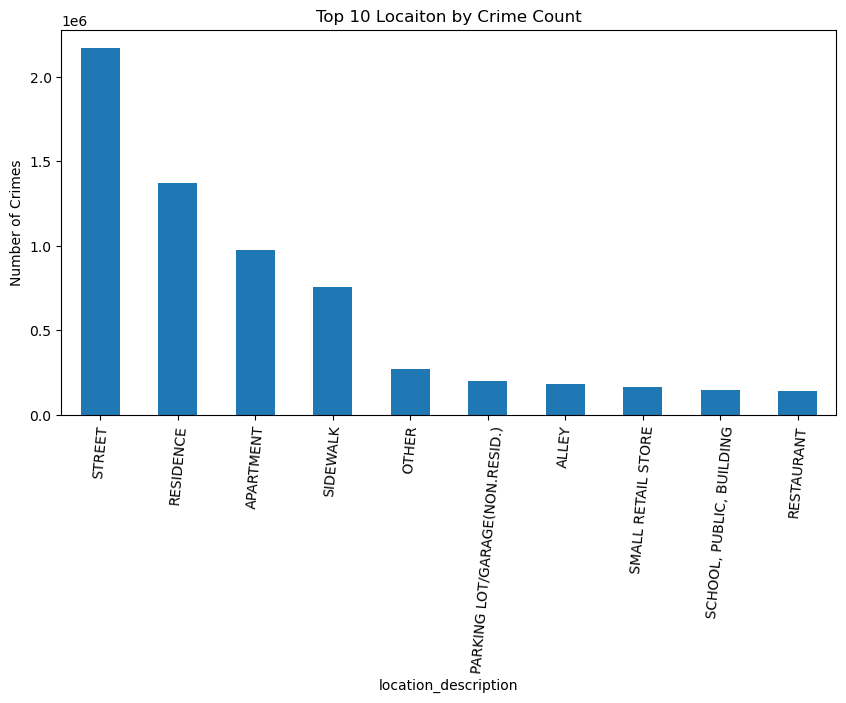

In [12]:
# Most Frequent Location
crimes_by_location = df['location_description'].value_counts().head(10)
plt.figure(figsize=(10, 5))
crimes_by_location.plot(kind='bar')
plt.title("Top 10 Locaiton by Crime Count")
plt.xlabel("location_description")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=85)
plt.show()

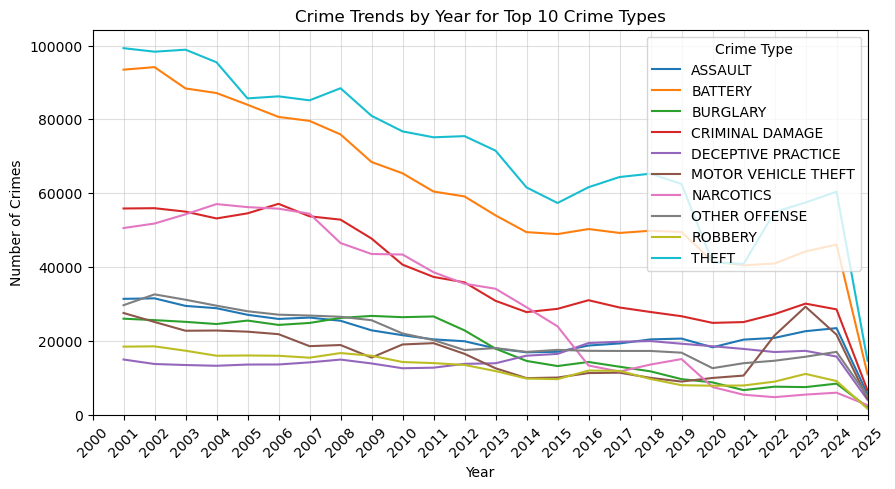

In [13]:

top_crimes = df['primary_type'].value_counts().head(10).index
df_top_crimes = df[df['primary_type'].isin(top_crimes)] # filtering the top 10 crime types 


crimes_by_type_year = df_top_crimes.groupby(['year', 'primary_type']).size().unstack(fill_value=0)
crimes_by_type_year

plt.figure(figsize=(10, 5))
# For each crime type plotting the crime coutns
for crime_type in crimes_by_type_year.columns:
    plt.plot(crimes_by_type_year.index, crimes_by_type_year[crime_type], label=crime_type)


plt.title("Crime Trends by Year for Top 10 Crime Types")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xlim(2000, 2025)
plt.ylim(0, crimes_by_type_year.max().max() + 5000)
plt.xticks(range(2000, 2026), rotation=45)
plt.legend(title="Crime Type", loc='upper right', fontsize=10)
plt.grid(alpha=0.4)
plt.show()

In [12]:
# Group by primary_type and calculate the total count and arrests count
crime_arrests = df.groupby('primary_type')['arrest'].value_counts().unstack(fill_value=0)
crime_arrests

crime_arrests['arrest_proportion'] = crime_arrests[True] / (crime_arrests[True] + crime_arrests[False])

# Sort by arrest proportion in descending order
crime_arrests = crime_arrests.sort_values(by='arrest_proportion', ascending=False)

print(crime_arrests[['arrest_proportion']].head(10) * 100)

arrest                             arrest_proportion
primary_type                                        
DOMESTIC VIOLENCE                         100.000000
PROSTITUTION                               99.573312
NARCOTICS                                  99.367329
GAMBLING                                   99.276599
LIQUOR LAW VIOLATION                       99.057900
PUBLIC INDECENCY                           98.130841
CONCEALED CARRY LICENSE VIOLATION          96.701847
INTERFERENCE WITH PUBLIC OFFICER           91.686076
OBSCENITY                                  74.702703
WEAPONS VIOLATION                          72.465741


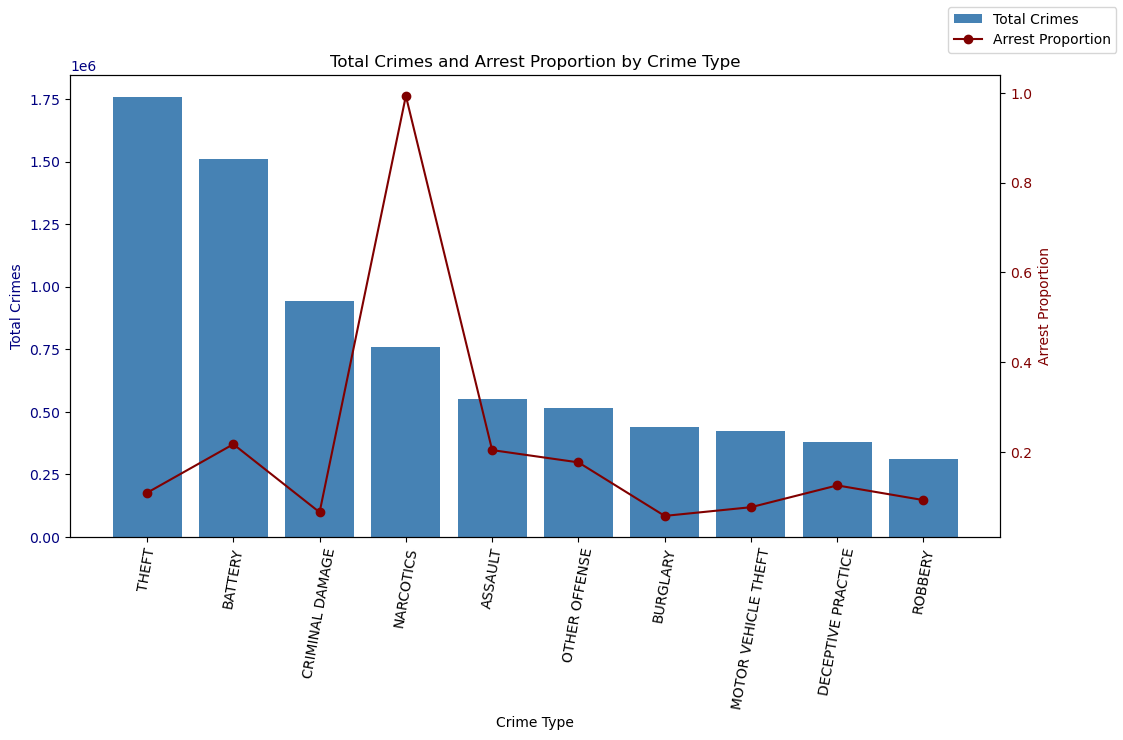

In [21]:

# Group by primary_type and calculate total crimes and arrest proportions
crime_stats = df.groupby('primary_type').agg(
    Total_Crimes=('arrest', 'size'),
    arrests=('arrest', 'sum')
).reset_index()

crime_stats['arrest_proportion'] = crime_stats['arrests'] / crime_stats['Total_Crimes']

# Sorting by total crimes (top 10 types by crime counts )
crime_stats = crime_stats.sort_values(by='Total_Crimes', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for total crimes
ax1.bar(crime_stats['primary_type'], crime_stats['Total_Crimes'], color='steelblue', label='Total Crimes')
ax1.set_xlabel('Crime Type')
ax1.set_ylabel('Total Crimes', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_title('Total Crimes and Arrest Proportion by Crime Type')

# Line plot for arrest proportion
ax2 = ax1.twinx()
ax2.plot(crime_stats['primary_type'], crime_stats['arrest_proportion'], color='maroon', marker='o', label='Arrest Proportion')
ax2.set_ylabel('Arrest Proportion', color='maroon')
ax2.tick_params(axis='y', labelcolor='maroon')

fig.legend(loc='upper right', )

ax1.set_xticks(range(0,10) ,labels = crime_stats['primary_type'], rotation = 80)
# Rotate x-axis labels for better readability
# plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

## Spatial Visualization

In [15]:
import geopandas as gpd
community_areas = gpd.read_file("./data/CommAreas_20250412.geojson")
community_areas.to_crs(epsg=3435, inplace=True)


In [17]:
community_areas.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((1181572.473 1886828.535, 11815..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((1186288.639 1876751.232, 11862..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((1176344.293 1871188.039, 11763..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((1182321.32 1876675.227, 118232..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((1186288.639 1876751.232, 11862..."


EPSG:3435


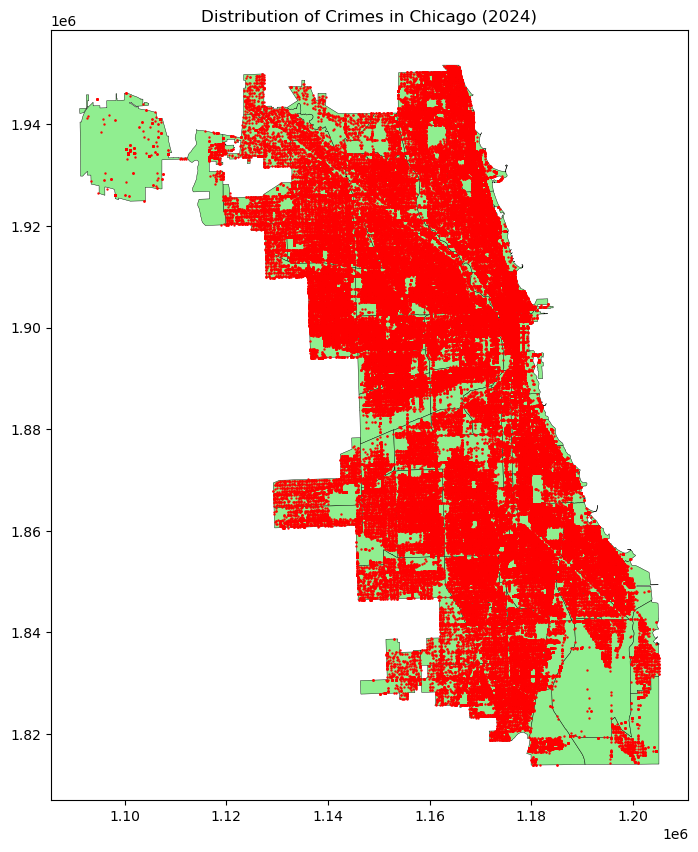

In [18]:

fig, ax = plt.subplots(1, 1, figsize=(10,10))
community_areas.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3)

# Plotting only for 2024 to reduce the number of data points
filtered_df = df[df['year'] == 2024]
# filtered_df = df
crime_data = gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df['x_coordinate'], filtered_df['y_coordinate']))
crime_data.plot(ax=ax, color='red', marker='o', markersize=0.5)
crime_data.set_crs(epsg=3435, inplace=True)
print(crime_data.crs)
# ax.plot(df['x_coordinate'][100:],df['y_coordinate'][100:])

plt.title("Distribution of Crimes in Chicago (2024)")
plt.show()

EPSG:3435


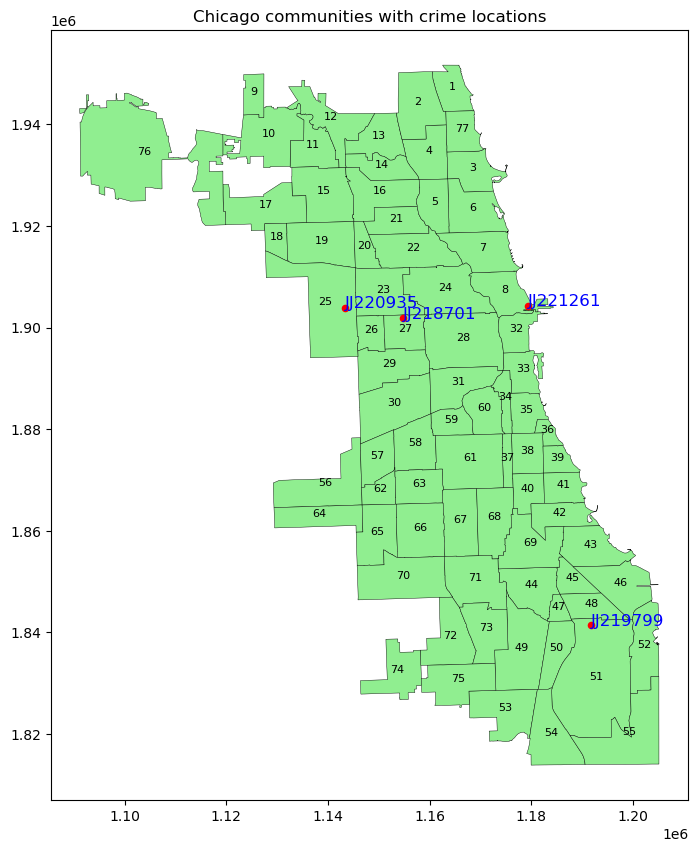

In [29]:
# Visual demonstration of missing community imputation


fig, ax = plt.subplots(1, 1, figsize=(10,10))
community_areas.plot(ax=ax, color='lightgreen', edgecolor='black', linewidth=0.3)

# Plotting only for 2024 to reduce the number of data points
filtered_df = df[df['year'] == 2024]
filtered_df = df.iloc[:5]
crime_data = gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df['x_coordinate'], filtered_df['y_coordinate']))
crime_data.plot(ax=ax, color='red', marker='o', markersize=20)
crime_data.set_crs(epsg=3435, inplace=True)
print(crime_data.crs)
# ax.plot(df['x_coordinate'][100:],df['y_coordinate'][100:])
# Annotate area_id at centroid of each community area
for idx, row in community_areas.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, str(row['area_num_1']), fontsize=8, ha='center', color='black')

# Annotate id at each crime point
for idx, row in crime_data.iterrows():
    ax.text(row.x_coordinate, row.y_coordinate, str(row['case_number']), fontsize=12, color='blue')


plt.title("Chicago communities with crime locations")
plt.show()